# Analysis: Player Efficiency and Shot Profiles – Premier League 2024/25

## Objective
This analysis aimed to build detailed efficiency and shot profiles of players in the English Premier League (EPL) for the 2024/25 season. By combining metrics related to shooting volume, shot quality, and passing influence, the goal was to identify:
- The most clinical finishers
- The most frequent shooters
- The most efficient all-round offensive players

## Key Questions Addressed
1. **Which players were the most clinical finishers based on shooting efficiency (Goals per Shot)?**
2. **Which players demonstrated high offensive influence through key passes per 90 minutes?**
3. **Who were the most efficient all-round contributors, considering both goal involvement and key passes?**
4. **How did shot volume (Shots per 90) compare with shot quality (xG per Shot)?**
5. **Can players be classified as volume shooters, clinical finishers, or both?**

---

## Step 1: Importing Libraries and Loading Scraped Data

In this step, the essential libraries for data handling, visualization, and numerical analysis were imported. Additionally, the CSV file containing player performance statistics from the 2024/25 Premier League season, previously obtained through web scraping, was loaded for further analysis.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.grid'] = True

players_df = pd.read_csv('EPL_2024_25_Understat.csv')

---
## Step 2: Clean and Rename Columns

To enhance readability and maintain consistency throughout the analysis, certain columns were renamed using more intuitive and descriptive labels.

In [2]:
# Renaming columns
players_df.rename(columns={
    'games' : 'Games',
    'time' : 'Minutes Played',
    'goals' : 'Goals',
    'assists' : 'Assists',
    'shots' : 'Shots',
    'key_passes' : 'Key Passes',
    'yellow_cards' : 'Yellow Cards',
    'red_cards' : 'Red Cards',
    'position' : 'Position',
    'player_name': 'Player',
    'team_title': 'Team',
    'xGChain': 'xG Chain',
    'xGBuildup': 'xG Buildup'
}, inplace=True)

# Check the shape of the dataset
print("Dataset shape:", players_df.shape)

# List all column names
print("Columns:", players_df.columns)

Dataset shape: (562, 18)
Columns: Index(['id', 'Player', 'Games', 'Minutes Played', 'Goals', 'xG', 'Assists',
       'xA', 'Shots', 'Key Passes', 'Yellow Cards', 'Red Cards', 'Position',
       'Team', 'npg', 'npxG', 'xG Chain', 'xG Buildup'],
      dtype='object')


---
## Step 3: Player Efficiency Profiles

### Objective:
In this step, efficiency profiles for players were developed by focusing on their shooting and passing effectiveness. Specifically, the analysis:
- Calculated shooting efficiency using **Goals per Shot**
- Evaluated offensive influence using **Key Passes per 90 minutes**
- Identified the most efficient all-round attacking players

These metrics helped pinpoint players who were both clinical finishers and influential chance creators during the 2024/25 Premier League season.


In [3]:
# Calculate Nineties (matches played per 90 minutes)
players_df['Nineties'] = players_df['Minutes Played'] / 90

# Calculate Goals per Shot (Shooting Efficiency)
players_df['Goals per Shot'] = players_df['Goals'] / players_df['Shots']

# Calculate xG per Shot (Shot Quality)
players_df['xG per Shot'] = players_df['xG'] / players_df['Shots']

# Calculate Shots per 90 (Shot Volume)
players_df['Shots per 90'] = players_df['Shots'] / players_df['Nineties']

# Calculate Key Passes per 90 (Passing Influence)
players_df['Key Passes per 90'] = players_df['Key Passes'] / players_df['Nineties']

# Calculate Total Offensive Contribution per 90 (Combined offensive output)
players_df['Total Offensive Contribution per 90'] = (players_df['Goals'] + players_df['Assists'] + players_df['Key Passes']) / players_df['Nineties']

players_df[['Player', 'Team', 'Position', 'Goals per Shot', 'xG per Shot', 'Shots per 90', 'Key Passes per 90', 'Total Offensive Contribution per 90']].head()

,Player,Team,Position,Goals per Shot,xG per Shot,Shots per 90,Key Passes per 90,Total Offensive Contribution per 90
0,Mohamed Salah,Liverpool,F M,0.223077,0.213125,3.449292,2.361439,3.608491
1,Alexander Isak,Newcastle United,F,0.232323,0.225828,3.157335,1.339476,2.264352
2,Erling Haaland,Manchester City,F,0.201835,0.219767,3.568570,0.949436,1.767916
3,Chris Wood,Nottingham Forest,F S,0.294118,0.229980,2.023810,0.654762,1.339286
4,Bryan Mbeumo,Brentford,D F M,0.232558,0.158514,2.263820,1.842644,2.553378


---
## Step 4: Cleaning Team Data for Multi-Club Players

Throughout the season, some players transferred between clubs, leading to multiple teams being listed in the dataset (e.g., "Arsenal, Fulham"). To ensure each player was accurately associated with a single club, the most recent team was retained.


In [4]:
players_df['Team'] = players_df['Team'].apply(lambda x: x.split(',')[-1].strip())

print("Unique teams after cleaning:")
print(players_df['Team'].unique())

Unique teams after cleaning:
['Liverpool' 'Newcastle United' 'Manchester City' 'Nottingham Forest'
 'Brentford' 'Aston Villa' 'Wolverhampton Wanderers' 'Chelsea'
 'Crystal Palace' 'West Ham' 'Fulham' 'Bournemouth' 'Ipswich' 'Tottenham'
 'Brighton' 'Leicester' 'Arsenal' 'Everton' 'Manchester United'
 'Southampton']


---
## Step 5: Analyzing Shot Quality vs. Shot Volume

In this step, each player's shot quality (measured by expected goals per shot) was compared to their shot volume (measured by shots per 90 minutes). This comparison aimed to identify:
- **Clinical Finishers:** Players who took fewer shots but consistently created high-quality chances.
- **Volume Shooters:** Players who frequently attempted shots, often from lower-quality positions.

To ensure relevance and statistical significance, the analysis was limited to players who appeared in at least 20 games during the season.


In [5]:
filtered_df = players_df[players_df['Games'] >= 20].copy()

In [6]:
import plotly.graph_objects as go

# Identify top players
top_clinical = filtered_df.sort_values(by='xG per Shot', ascending=False).head(5)
top_volume = filtered_df.sort_values(by='Shots per 90', ascending=False).head(5)

# Combine unique players from both groups
highlight_players = pd.concat([top_clinical, top_volume]).drop_duplicates(subset='Player')

filtered_df['Label'] = filtered_df['Player'].apply(lambda x: x if x in highlight_players['Player'].values else '')

fig = go.Figure()

# Plot all players
fig.add_trace(go.Scatter(
    x=filtered_df['Shots per 90'],
    y=filtered_df['xG per Shot'],
    mode='markers',
    marker=dict(size=10, opacity=0.7),
    text=filtered_df['Player'],
    hoverinfo='text',
    marker_color=filtered_df['Team'].astype('category').cat.codes 
))

for _, row in filtered_df[filtered_df['Label'] != ''].iterrows():
    fig.add_annotation(
        x=row['Shots per 90'],
        y=row['xG per Shot'] + 0.02,
        text=row['Player'],
        showarrow=False,
        font=dict(size=12, color='black')
    )

fig.update_layout(
    title='Shot Quality vs. Shot Volume (Minimum 20 Games Played)',
    xaxis_title='Shots per 90',
    yaxis_title='xG per Shot',
    width=950,
    height=700,
    showlegend=False
)

fig.show()

In [7]:
# Identify top 5 clinical finishers (highest xG per Shot)
top_clinical_finishers = filtered_df.sort_values(by='xG per Shot', ascending=False).head(5)[
    ['Player', 'Team', 'Position', 'Games', 'xG per Shot', 'Shots per 90']
]

# Identify top 5 volume shooters (highest Shots per 90)
top_volume_shooters = filtered_df.sort_values(by='Shots per 90', ascending=False).head(5)[
    ['Player', 'Team', 'Position', 'Games', 'xG per Shot', 'Shots per 90']
]

print("Top 5 Clinical Finishers (Highest xG per Shot):")
display(top_clinical_finishers.style.format({'xG per Shot': '{:.2f}', 'Shots per 90': '{:.2f}'}).set_properties(**{'text-align': 'center'}))

print("\nTop 5 Volume Shooters (Highest Shots per 90):")
display(top_volume_shooters.style.format({'xG per Shot': '{:.2f}', 'Shots per 90': '{:.2f}'}).set_properties(**{'text-align': 'center'}))

Top 5 Clinical Finishers (Highest xG per Shot):


,Player,Team,Position,Games,xG per Shot,Shots per 90
144,William Saliba,Arsenal,D,35,0.53,0.18
204,Conor Coady,Leicester,D S,22,0.32,0.11
212,Taiwo Awoniyi,Nottingham Forest,F S,26,0.24,2.48
162,Cameron Archer,Southampton,F S,35,0.24,1.85
5,Yoane Wissa,Brentford,F M S,35,0.23,2.75



Top 5 Volume Shooters (Highest Shots per 90):


,Player,Team,Position,Games,xG per Shot,Shots per 90
51,Jhon Durán,Aston Villa,F S,20,0.16,4.96
168,Julio Enciso,Ipswich,M S,25,0.05,4.01
111,Eddie Nketiah,Crystal Palace,F M S,29,0.17,3.93
41,Rodrigo Muniz,Fulham,F S,31,0.17,3.90
55,Diogo Jota,Liverpool,F S,26,0.20,3.86


## Key Takeaways : Player Shooting Profiles

Based on the analysis of shooting efficiency and shot volume among players who have played at least 20 games in the 2024/25 Premier League season:

- **Clinical Finishers:**  
  These players exhibit the highest expected goals per shot (xG per Shot), suggesting they consistently take high-quality shots and convert chances efficiently. Their strength lies in shot quality rather than shooting frequency.

- **Volume Shooters:**  
  These players register the highest number of shots per 90 minutes, indicating their active involvement in the attacking phase with frequent shot attempts. However, high shot volume does not necessarily correlate with shooting efficiency.

This distinction allows us to understand whether a player contributes through elite finishing ability or through sustained attacking involvement.

The tables above present the top five players in each category, including their teams, positions, games played, xG per shot, and shots per 90 minutes.

---
### Step 6 - Visualizing Top Performers: Clinical Finishers and Volume Shooters

In this step, we will visualize:
- The top 10 **clinical finishers**: players with the highest expected goals per shot (xG per Shot).
- The top 10 **volume shooters**: players who take the most shots per 90 minutes.

These bar plots provide a quick visual reference to identify standout players in terms of both shooting efficiency and shot volume.

### Plot Details:
- A **Blues palette** is used to represent clinical finishers, emphasizing shooting efficiency.
- A **Reds palette** is used to represent volume shooters, emphasizing shot-taking frequency.


C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\4134946192.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




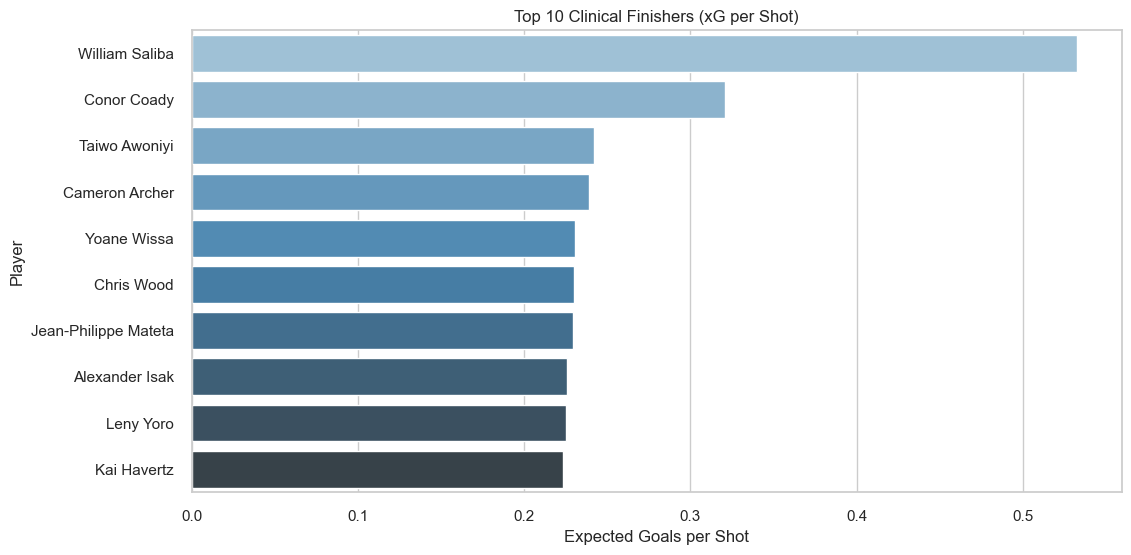

C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\4134946192.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




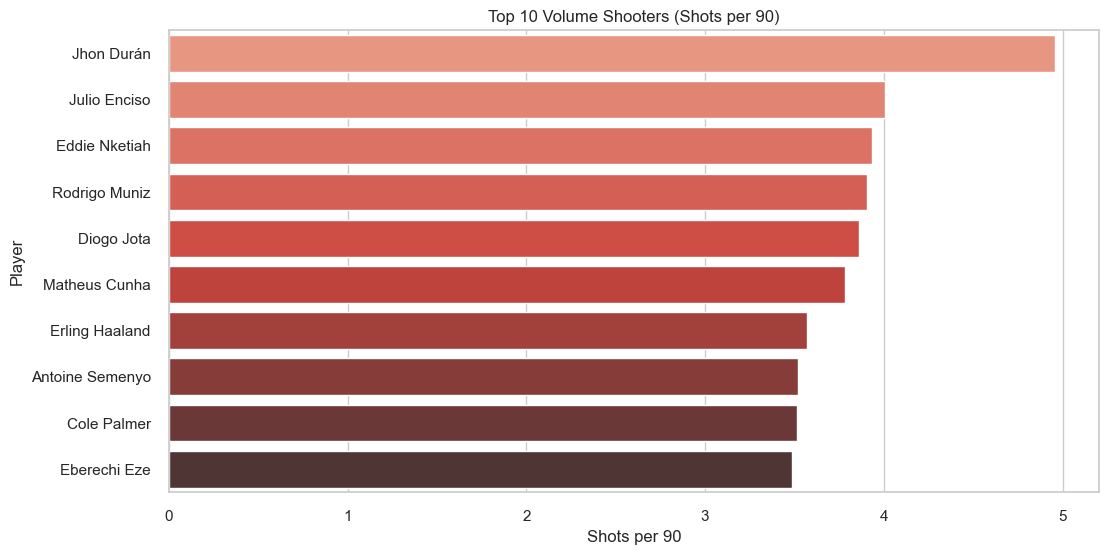

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Top 10 Clinical Finishers (High xG per Shot)
top_clinical = filtered_df.sort_values(by='xG per Shot', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_clinical, x='xG per Shot', y='Player', palette='Blues_d')
plt.title('Top 10 Clinical Finishers (xG per Shot)')
plt.xlabel('Expected Goals per Shot')
plt.ylabel('Player')
plt.show()

# Top 10 Volume Shooters (High Shots per 90)
top_volume = filtered_df.sort_values(by='Shots per 90', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_volume, x='Shots per 90', y='Player', palette='Reds_d')
plt.title('Top 10 Volume Shooters (Shots per 90)')
plt.xlabel('Shots per 90')
plt.ylabel('Player')
plt.show()

---
# Conclusion: Player Efficiency and Shot Profiles

This analysis provided detailed insights into the shooting profiles of Premier League players for the 2024/25 season.

## Key Takeaways :
- **Clinical Finishers:** These players consistently generated high-quality shots, as reflected by their high expected goals per shot (xG per Shot). They demonstrated superior shot selection and efficiency, often needing fewer attempts to produce significant goal-scoring opportunities.
- **Volume Shooters:** These players contributed heavily through frequent shot attempts, maintaining high attacking involvement. However, high volume does not always equate to clinical finishing.

By distinguishing between clinical finishers and volume shooters, we gain a deeper understanding of each player’s attacking style and contribution. Some players excel by maximizing the quality of fewer chances, while others influence games through relentless shot generation.

This profiling can support more nuanced player evaluation, tactical decisions, and scouting assessments.

---